In [18]:
from molmap import loadmap
from joblib import load, dump
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm

from aggmap.show import imshow, imshow_wrap
from aggmap.utils.matrixopt import smartpadding

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"]="4"

In [20]:
from config import P
seed = P.seed #for the random permutation
metric = P.metric  # similarity measurement
var_thr = P.var_thr  # feature variance should larger than 0


data_save_folder = P.mnist_data_save_folder
mnist_labels_dict = P.mnist_labels_dict


results_save_folder = P.results_save_folder
color_list = P.color_list

mp = loadmap(os.path.join(data_save_folder, 'mp_ORSAgg1.mp'))

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #(x_train, y_train), (x_test, y_test)
trainY = pd.get_dummies(y_train).values.astype(float)
testY = pd.get_dummies(y_test).values.astype(float)


In [22]:
_, w, h = x_train.shape
orignal_cols = ['p-%s' % str((i+1)).zfill(len(str(w*h))) for i in range(w*h)]

In [26]:
x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], w*h), columns = orignal_cols)
x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0], w*h), columns = orignal_cols)
shuffled_cols = shuffle(orignal_cols, random_state=seed)
x_train_df = x_train_df[shuffled_cols]
x_test_df = x_test_df[shuffled_cols]

In [27]:
X = mp.batch_transform(x_test_df.values, scale=False)

100%|##########| 10000/10000 [00:09<00:00, 1089.87it/s]


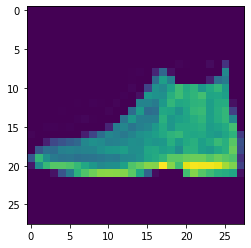

In [42]:
plt.imshow(x_test[0])

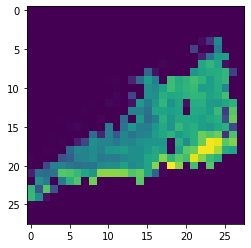

In [40]:
plt.imshow(X[0].reshape(28,28))

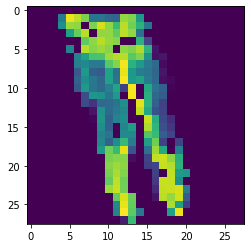

In [39]:
plt.imshow(X[3].reshape(28,28))

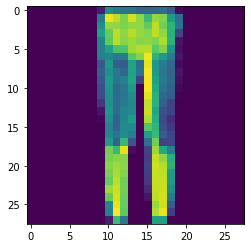

In [37]:
plt.imshow(x_test[3])

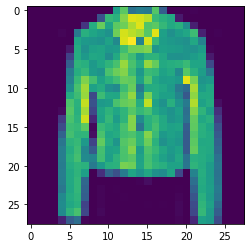

In [47]:
plt.imshow(x_test[10])

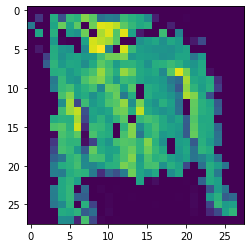

In [48]:
plt.imshow(X[10].reshape(28,28))

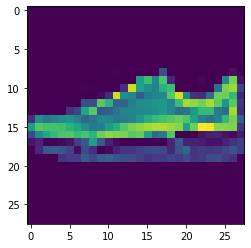

In [49]:
plt.imshow(x_test[9])

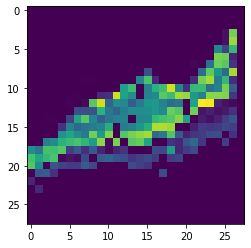

In [50]:
plt.imshow(X[9].reshape(28,28))

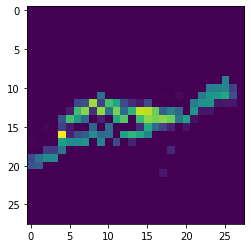

In [51]:
plt.imshow(X[8].reshape(28,28))

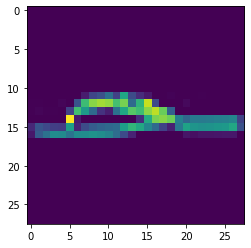

In [52]:
plt.imshow(x_test[8])

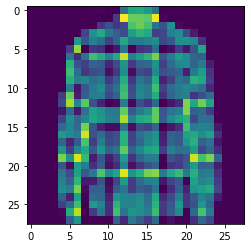

In [53]:
plt.imshow(x_test[7])

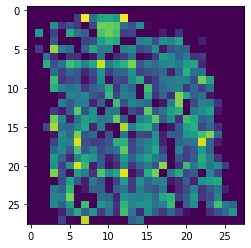

In [54]:
plt.imshow(X[7].reshape(28,28))

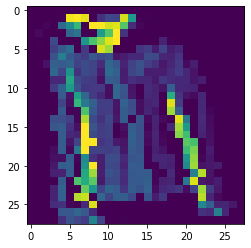

In [55]:
plt.imshow(X[6].reshape(28,28))

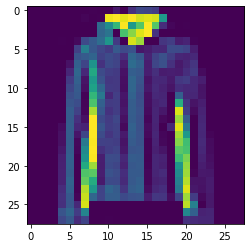

In [56]:
plt.imshow(x_test[6])

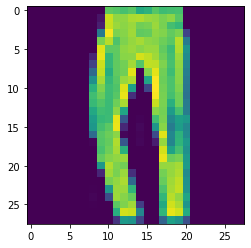

In [57]:
plt.imshow(x_test[5])

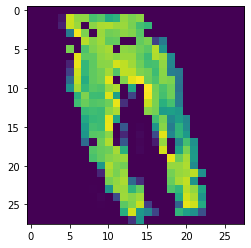

In [58]:
plt.imshow(X[5].reshape(28,28))

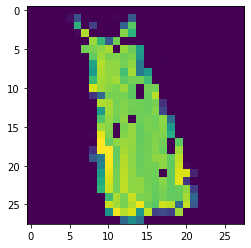

In [62]:
plt.imshow(X[13].reshape(28,28))

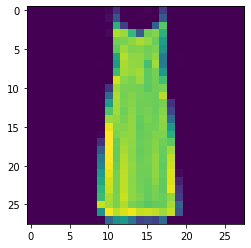

In [63]:
plt.imshow(x_test[13])

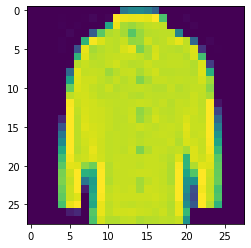

In [64]:
plt.imshow(x_test[14])

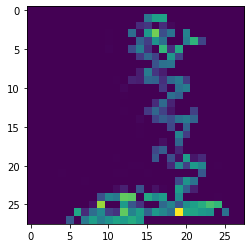

In [88]:
plt.imshow(X[2223].reshape(28,28))

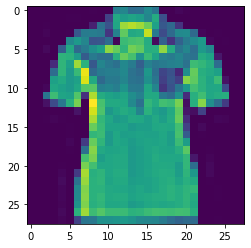

In [95]:
plt.imshow(x_test[229])